In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_histogram = pd.read_csv('histogram_fig')
df_learning = pd.read_csv('learning_fig')

baseline_fidelity = df_histogram["baseline fidelity"]
policy_fidelity = df_histogram["policy fidelity"]

single_rep_reward_history = df_learning["per-cycle fidelity"]
reward = df_learning["reward"]

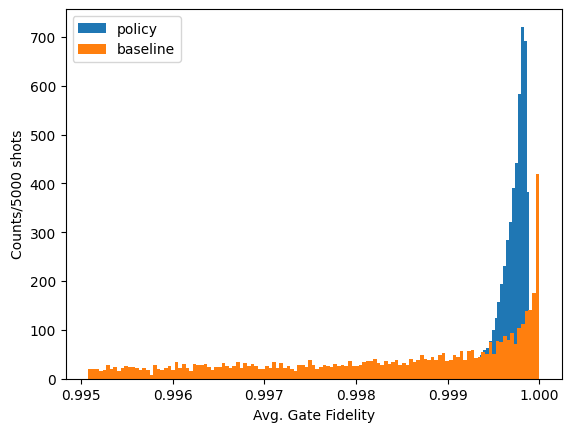

In [6]:
plt.hist(policy_fidelity, label='policy', bins=25)
plt.hist(baseline_fidelity, label='baseline', bins=125)
plt.xlabel('Avg. Gate Fidelity')
plt.ylabel('Counts/5000 shots')
plt.legend()
plt.savefig('general agent histogram')
plt.show()

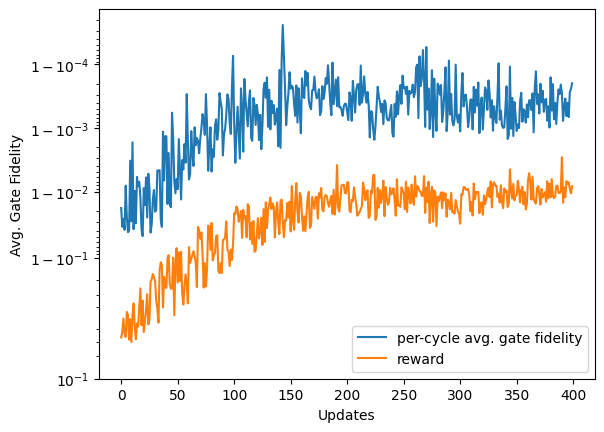

In [7]:
# Replace any invalid values
single_rep_reward_history = np.nan_to_num(single_rep_reward_history, nan=0.0, posinf=1.0, neginf=0.0)
mean_reward_history = np.nan_to_num(reward, nan=0.0, posinf=1.0, neginf=0.0)

plt.plot(single_rep_reward_history, label='per-cycle avg. gate fidelity')
plt.plot(mean_reward_history, label='reward')
plt.xlabel('Updates')
plt.ylabel('Avg. Gate Fidelity')
plt.yscale('logit')

# Set y-ticks without 0.00001
plt.yticks([0.1, 0.9, 0.99, 0.999, 0.9999])

# Format y-axis to show decimals instead of scientific notation
# plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))

plt.legend()
plt.savefig('general agent learning')
plt.show()